This notebook is responsible for the creation of various random forest regressors and displaying their results. Used in subchapter 3.2.2.5 under method and subchapter 4.1.2.4 under results. In addition used in subchapter 4.2 "Discussion of results".

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as MAE 

In [2]:
# VISUALS
# Figure size
plt.rcParams['figure.figsize'] = [16,10]

# Text sizes
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['axes.labelsize']= 12
plt.rcParams['font.size'] = 14

# Colors
plt.rcParams['legend.labelcolor'] = '#000000'
plt.rcParams['xtick.labelcolor'] = '#000000'
plt.rcParams['ytick.labelcolor'] = '#000000'
plt.rcParams['axes.labelcolor'] = '#000000'
plt.rcParams['axes.titlecolor'] = '#000000'
plt.rcParams['axes.edgecolor'] = '#000000'
plt.rcParams['xtick.color'] = '#000000'
plt.rcParams['ytick.color'] = '#000000'
plt.rcParams['figure.facecolor'] = '#ffffff'
plt.rcParams['axes.facecolor'] = '#ffffff'

# Graph colors
from cycler import cycler

diverse = ['#1f78b4', '#33a02c', '#e31a1c', '#ff7f00', '#6a3d9a', '#b15928', '#a6cee3', '#b2df8a', '#fb9a99']
greens = ['#2ca02c', '#4daf4a', '#45a05a', '#60bd68', '#5cb85c', '#6ba981', '#75bb6f', '#6dae64', '#4c9a5f']
blues = ['#1f78b4', '#377eb8', '#3182bd', '#4292c6', '#5aaed6', '#6baed6', '#7ba3df', '#92b3e4', '#a6bddb']
reds = ['#e41a1c', '#d73027', '#a50026', '#f46d43', '#d73027', '#fdae61', '#fee08b', '#fee08b', '#d73027']

plt.rcParams['axes.prop_cycle'] = cycler(color = diverse)

# Display max columns, pandas dataframes
pd.set_option('display.max_columns', None) 

In [2]:
df = pd.read_csv('../Data/TrondheimHousingDataCleaned.csv')
df.head()

,Matrikkel / Org-Anr,Address,Housing type,Primary room,Usable area,Gross area,Year of construction,Floor,Plot size,Last sold,...,Lon,Year,Month,Day,Policy rate,CPI,Change CPI,HPI Norway,HPI Trondheim,Borrowing rate%
0,5001-20/88/0/0,"Skogvegen 32, 7058 CHARLOTTENLUND",Selveier enebolig,441,517,567,2007.0,0,970.8,2021-02-28,...,10.4927,2021,2,28,0.0,115.3,0.7,130.7,123.5,1.77
1,5001-410/683/0/34,"Dyre Halses gate 11, 7042 TRONDHEIM",Selveierleilighet,55,55,60,2004.0,7,1043.2,2021-03-01,...,10.4134,2021,3,1,0.0,115.0,-0.3,130.7,123.5,1.77
2,5001-404/418/0/69,"Tellefsens gate 8, 7030 TRONDHEIM",Selveierleilighet,135,144,144,2019.0,5,3673.0,2021-03-01,...,10.3973,2021,3,1,0.0,115.0,-0.3,130.7,123.5,1.77
3,5001-52/224/0/128,"Heggdalsringen 65, 7049 TRONDHEIM",Selveierleilighet,69,73,73,2019.0,5,4572.6,2021-03-01,...,10.4535,2021,3,1,0.0,115.0,-0.3,130.7,123.5,1.77
4,5001-76/267/0/15,"Siriusvegen 10 A, 7037 TRONDHEIM",Selveierleilighet,74,74,81,1995.0,3,9300.8,2021-03-01,...,10.4113,2021,3,1,0.0,115.0,-0.3,130.7,123.5,1.77


In [4]:
X = df.select_dtypes(include = ['int','float']).drop(columns = ['Price', 'Total price at last sale'])
y = df['Total price at last sale']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.3)

### Testing n_estimators ###


In [5]:
model_1 = RandomForestRegressor(random_state = 42, n_estimators= 10).fit(X_train, y_train)
model_2 = RandomForestRegressor(random_state = 42, n_estimators= 20).fit(X_train, y_train)
model_3 = RandomForestRegressor(random_state = 42, n_estimators= 30).fit(X_train, y_train)
model_4 = RandomForestRegressor(random_state = 42, n_estimators= 40).fit(X_train, y_train)
model_5 = RandomForestRegressor(random_state = 42, n_estimators= 50).fit(X_train, y_train)

In [58]:
print("Model 1 score is: ", model_1.score(X_test, y_test))
print("Model 2 score is: ", model_2.score(X_test, y_test))
print("Model 3 score is: ", model_3.score(X_test, y_test))
print("Model 4 score is: ", model_4.score(X_test, y_test))
print("Model 5 score is: ", model_5.score(X_test, y_test))

Model 1 score is:  0.8525989945863744
Model 2 score is:  0.860192144239451
Model 3 score is:  0.8631446700688533
Model 4 score is:  0.8647163101381163
Model 5 score is:  0.8640377056525267


In [53]:
print("Model 4 train score is: ", model_4.score(X_train, y_train))
print("Model 4 test score is: ", model_4.score(X_test, y_test))

Model 4 train score is:  0.9757478035568978
Model 4 test score is:  0.8647163101381163


In [7]:
model_41 = RandomForestRegressor(random_state= 42, n_estimators = 40, max_depth = 20)
model_41.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=40, random_state=42)

In [188]:
print("Model 4.1 train score is: ", model_41.score(X_train, y_train))
print("Model 4.1 test score is: ", model_41.score(X_test, y_test))

Model 4.1 train score is:  0.9752073342009955
Model 4.1 test score is:  0.866392881742795


In [189]:
model_41_pred_train = model_41.predict(X_train)
model_41_pred_test = model_41.predict(X_test)

In [191]:
print('MAE on train', MAE(y_train, model_41_pred_train))
print('MAE on test', MAE(y_test, model_41_pred_test))

MAE on train 165829.25446158534
MAE on test 419132.6894135673


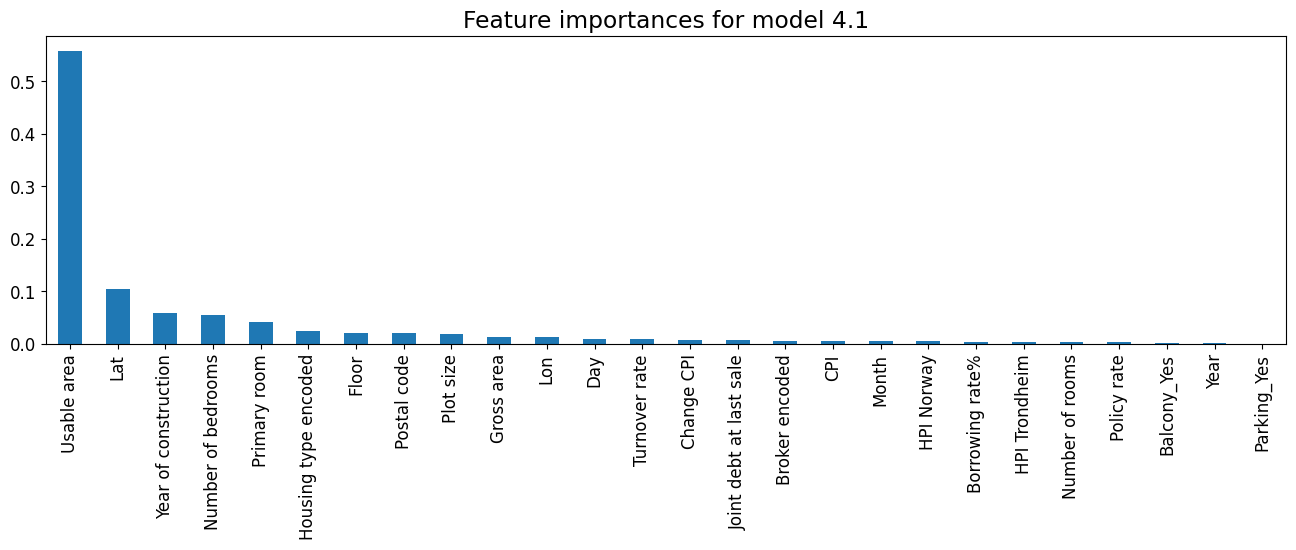

In [9]:
importances = pd.DataFrame(model_41.feature_importances_,
                              columns = ['Importances'],
                              index = X_train.columns)
importances.sort_values(by = ['Importances'], axis = 0,
                           ascending = False, inplace = True)

importances['Importances'].plot(kind = 'bar', figsize = (16, 4))
plt.title('Feature importances for model 4.1')
plt.show()

Using grid search with four-fold cross validation to find a better pre pruned model than the manually tuned one above.  Inspiration has been taken here from suggestions made by OpenAI's ChatGPT. We asked how we could find a good set of pre pruning values for a random forest regressor efficiently.

In [175]:
grid = {
    'n_estimators': [60, 80, 100],
    'max_depth': [5, 7, 10],
    'min_samples_split': [3, 5, 7],
    'min_samples_leaf': [3, 5, 7],
    'max_features': [14, 15, 16]
}

grid_search = GridSearchCV(estimator = RandomForestRegressor(random_state = 42),
                           param_grid = grid,
                           scoring = 'neg_root_mean_squared_error',
                           cv = 4).fit(X_train, y_train)

print(grid_search.best_params_)

{'max_depth': 10, 'max_features': 15, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 100}


In [176]:
best_estimator = RandomForestRegressor(random_state = 42, 
                                       **grid_search.best_params_).fit(X_train, y_train)

print(best_estimator.score(X_train, y_train))
print(best_estimator.score(X_test, y_test))

0.9075936939962242
0.8479016055015602


In [13]:
print('MAE on train:\t', MAE(y_train, best_estimator.predict(X_train)))
print('MAE on test:\t', MAE(y_test, best_estimator.predict(X_test)))

MAE on train:	 374666.8600297911
MAE on test:	 472812.03255726653


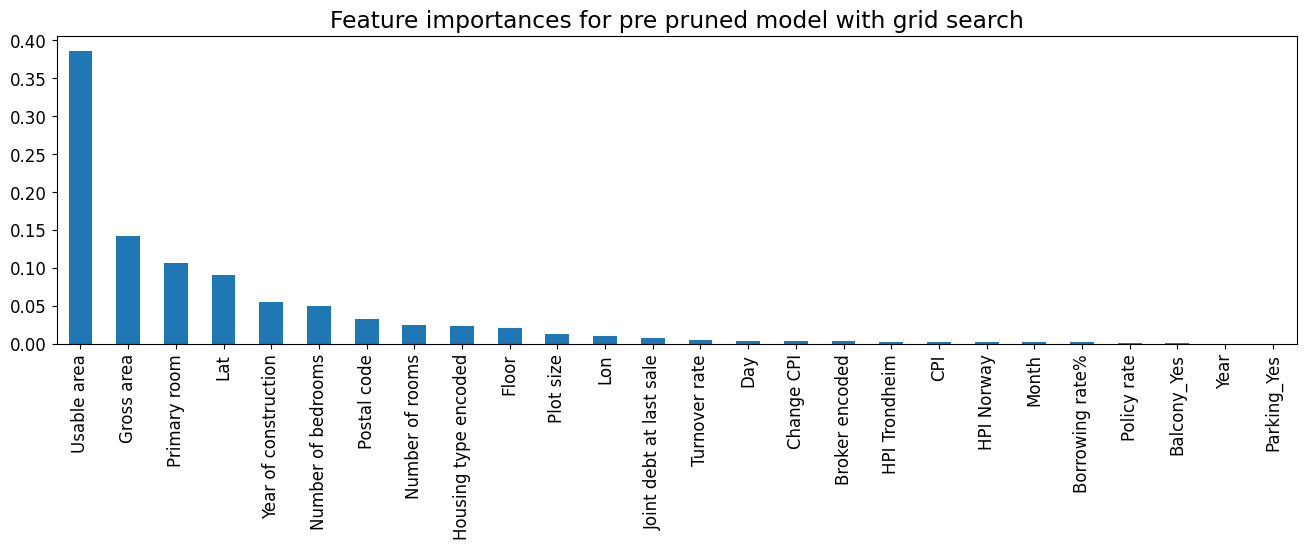

In [14]:
importances = pd.DataFrame(best_estimator.feature_importances_,
                              columns = ['Importances'],
                              index = X_train.columns)
importances.sort_values(by = ['Importances'], axis = 0,
                           ascending = False, inplace = True)

importances['Importances'].plot(kind = 'bar', figsize = (16, 4))
plt.title('Feature importances for pre pruned model with grid search')
plt.show()

Attempting minimal cost complexity pruning with the random forest regressor. First specifying 50 different possible values for alpha and using three-fold cross validation to evaluate the model with each value of alpha.

In [169]:
alphas = np.arange(0, 100000000001, 2000000000)
cv_results_rfr = []

for alpha in alphas:
    model = RandomForestRegressor(random_state = 42, ccp_alpha = alpha)
    scores = cross_val_score(model, X_train, y_train, cv = 3)
    cv_results_rfr.append([alpha, np.mean(scores)])

cv_results_rfr_df = pd.DataFrame(cv_results_rfr, columns = ['Alpha', 'Mean Accuracy'])

In [172]:
best_accuracy = cv_results_rfr_df['Mean Accuracy'].max()

optimal_alpha = cv_results_rfr_df[cv_results_rfr_df['Mean Accuracy'] == best_accuracy]['Alpha']

optimal_alpha

0    0
Name: Alpha, dtype: int64

In [171]:
mccp_rfr = RandomForestRegressor(random_state = 42, 
                                 ccp_alpha = optimal_alpha.iloc[0]).fit(X_train, y_train)

print(mccp_rfr.score(X_train, y_train))
print(mccp_rfr.score(X_test, y_test))

0.9775727821842146
0.8649748362021595


In [16]:
print('MAE on train:\t', MAE(y_train, mccp_rfr.predict(X_train)))
print('MAE on test:\t', MAE(y_test, mccp_rfr.predict(X_test)))

MAE on train:	 158090.20993111568
MAE on test:	 417033.24969846767


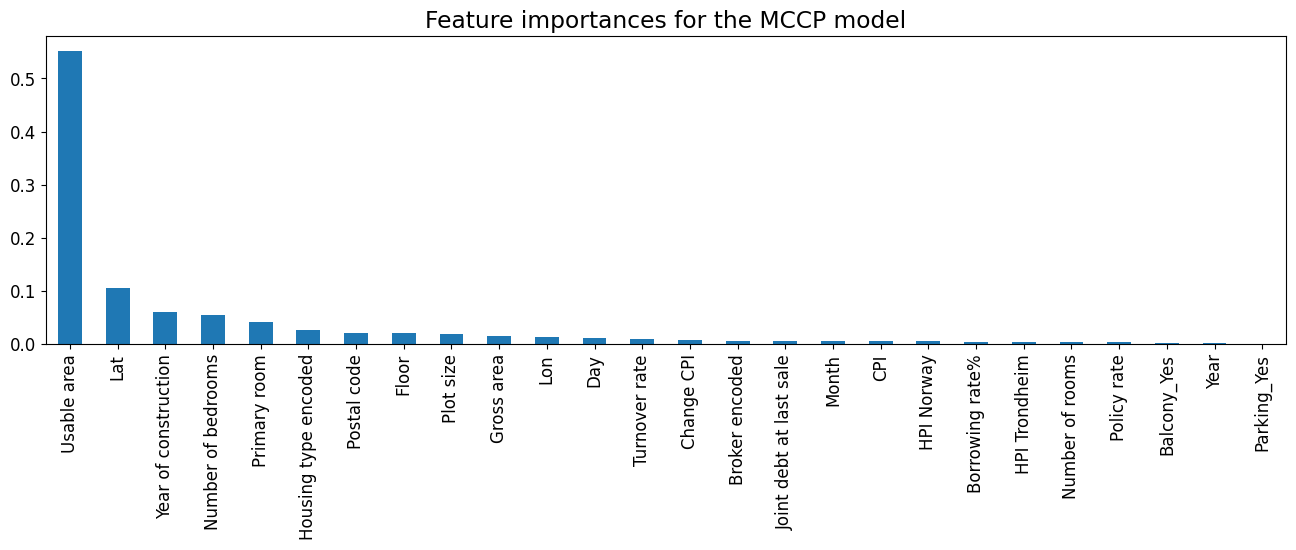

In [17]:
importances = pd.DataFrame(mccp_rfr.feature_importances_,
                              columns = ['Importances'],
                              index = X_train.columns)
importances.sort_values(by = ['Importances'], axis = 0,
                           ascending = False, inplace = True)

importances['Importances'].plot(kind = 'bar', figsize = (16, 4))
plt.title('Feature importances for the MCCP model')
plt.show()

Below we take a look at the actual price vs the predicted price and the residuals for the best of the three models, the pre pruned model by means of grid search with cross validation.

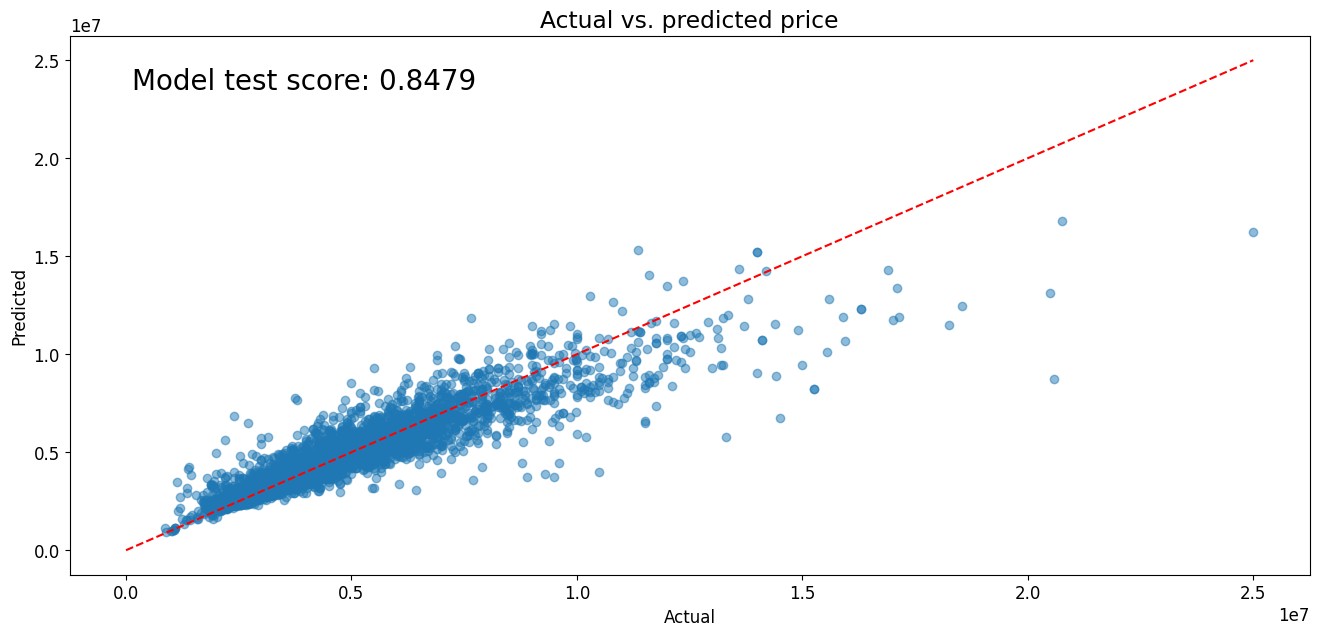

In [18]:
plt.figure(figsize = (16, 7))
plt.scatter(y_test, best_estimator.predict(X_test), alpha = .5)
plt.plot(np.linspace(0, y_test.max(), num = 2),
         np.linspace(0, y_test.max(), num = 2),
         color = 'red', linestyle = '--')

plt.text(0.05, 0.9, f'Model test score: {best_estimator.score(X_test, y_test):.4f}',
         transform=plt.gca().transAxes, fontsize=20, ha='left')

plt.title('Actual vs. predicted price')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()


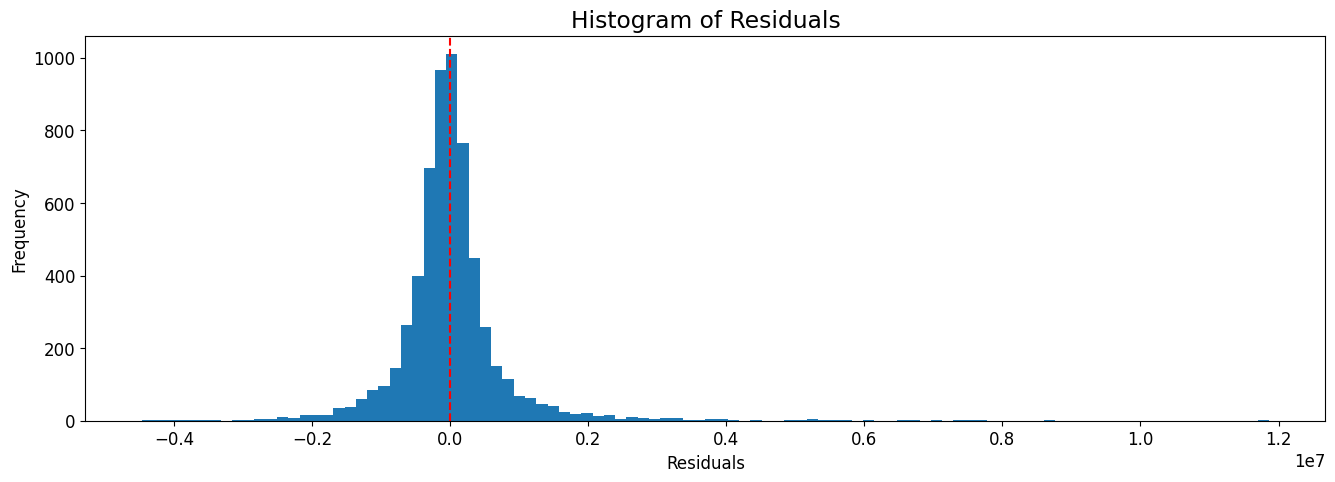

In [19]:
plt.figure(figsize = (16, 5))
plt.hist(y_test - best_estimator.predict(X_test), bins = 100)
plt.axvline(0, color = 'red', linestyle = '--')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

## Example of savings needed

In [180]:
input_data = {
    'Primary room': 85,
    'Usable area': 85,
    'Gross area': 500,
    'Year of construction': 2015,
    'Floor': 2,
    'Plot size': 500,
    'Joint debt at last sale': 0,
    'Number of rooms': 3,
    'Number of bedrooms': 2,
    'Turnover rate': 20,
    'Postal code': 7030,
    'Broker encoded': 1,
    'Housing type encoded': 7, 
    'Balcony_Yes': 1,
    'Parking_Yes': 1,
    'Lat': 63.4,
    'Lon': 10.4,
    'Year': 2026,
    'Month': 8,
    'Day': 15,
    'Policy rate': 4.5,
    'CPI': 135,
    'Change CPI': 0,
    'HPI Norway': 137,
    'HPI Trondheim': 132,
    'Borrowing rate%': 5
}


In [181]:
input_df = pd.DataFrame([input_data])

# Make predictions using the trained model
predicted_price = best_estimator.predict(input_df)

print("Predicted price:", predicted_price)


Predicted price: [5702386.28926077]


In [183]:
# Calculates the equity requirement
5700000 * 0.15

855000.0

In [184]:
855000 / 2

427500.0